In [2]:
# import library
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

import pymoo
from pymoo.model.problem import Problem

import pandas as pd


import joblib

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)


read_data = pd.read_csv("../result/result_0628_F151_N10000_amorphous_h20_hlimit150_res0.1.csv")

read_data = read_data.sort_values('w', ascending=True)

#read_data = read_data[read_data["copperloss_tx"]<35]
#read_data = read_data[read_data["copperloss_rx"]<11]


read_data

,Unnamed: 0,N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,strand1,strand2,V,B,Lmt,Llt,w,l,h,total_loss,copperloss_tx,copperloss_rx,copperloss,coreloss
0,22,8.0,46.0,20.0,97.0,93.0,3500.0,25.0,25.0,9.0,9.0,5.0,3.5,1.0,1.0,0.0,-14.0,1250.0,612.5,2354.133250,0.373380,613.670721,31.820153,101.0,175.25,133.0,118.231152,28.998359,40.527237,69.525596,48.705556
1,97,8.0,46.0,20.0,99.0,93.0,3500.0,25.0,25.0,9.0,9.0,5.0,4.0,1.0,1.0,0.0,-14.0,1250.0,800.0,2384.357500,0.373380,614.615792,31.755185,101.0,177.50,133.0,111.264635,28.994002,33.565077,62.559079,48.705556
2,95,8.0,46.0,20.0,100.0,93.0,3500.0,25.0,25.0,9.0,9.0,5.0,4.0,1.0,1.0,0.0,-5.0,1250.0,800.0,2397.790500,0.373380,607.626294,31.789664,101.0,178.50,133.0,111.107334,28.867806,33.533972,62.401778,48.705556
3,94,8.0,46.0,20.0,98.0,95.0,3500.0,25.0,25.0,10.0,10.0,5.0,4.1,1.0,1.0,0.0,-17.0,1250.0,840.5,2420.894250,0.373380,598.480326,31.748507,101.0,177.55,135.0,110.013455,29.055668,31.519816,60.575485,49.437970
4,47,8.0,46.0,20.0,99.0,95.0,3500.0,25.0,25.0,10.0,10.0,5.0,4.1,1.0,1.0,0.0,-10.0,1250.0,840.5,2434.529250,0.373380,598.128239,31.740258,101.0,178.55,135.0,109.884603,28.879928,31.566705,60.446633,49.437970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,8.0,72.0,13.0,95.0,109.0,3500.0,27.0,27.0,10.0,10.0,6.7,5.0,1.0,1.0,0.0,20.0,2244.5,1250.0,2935.290825,0.366997,589.857414,31.822446,132.7,163.85,135.0,96.430028,19.796414,27.822412,47.618826,48.811201
96,50,8.0,72.0,12.0,94.0,109.0,3500.0,27.0,27.0,10.0,10.0,6.7,4.7,1.0,1.0,0.0,13.0,2244.5,1104.5,2836.210370,0.397580,517.166303,31.766605,132.7,160.70,133.0,100.952323,19.855418,30.074452,49.929871,51.022452
97,80,8.0,75.0,11.0,93.0,101.0,3500.0,26.0,26.0,10.0,10.0,5.8,4.7,1.0,1.0,0.0,-17.0,1682.0,1104.5,2552.250000,0.416375,500.212255,31.816866,132.8,156.25,123.0,104.280135,25.702875,29.750371,55.453247,48.826888
98,63,8.0,75.0,11.0,93.0,102.0,3500.0,26.0,26.0,10.0,10.0,6.0,4.4,1.0,1.0,0.0,-17.0,1800.0,968.0,2576.050400,0.416375,504.500668,31.829684,133.0,156.20,124.0,109.548026,24.234277,36.089895,60.324172,49.223854


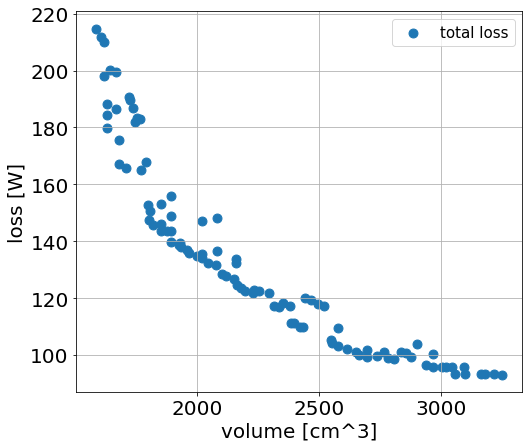

In [4]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)


plt.scatter(read_data["V"], read_data["total_loss"] ,s=80)
#plt.scatter(read_data["V"], read_data["copperloss_tx"] ,s=80)
#plt.scatter(read_data["V"], read_data["copperloss_rx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["total loss","copperloss_tx","copperloss_rx"], fontsize=15)
#plt.legend(["copperloss_tx","copperloss_rx"], fontsize=15)

In [5]:


read_data1 = pd.read_csv("../result/result_0628_F111_N10000_amorphous_h20_hlimit150_res0.1.csv")
read_data2 = pd.read_csv("../result/result_0628_F151_N10000_amorphous_h20_hlimit150_res0.1.csv")
#read_data3 = pd.read_csv("../result/result_0628_F151_N10000_ferrite_h30_hlimit150_res0.1.csv")



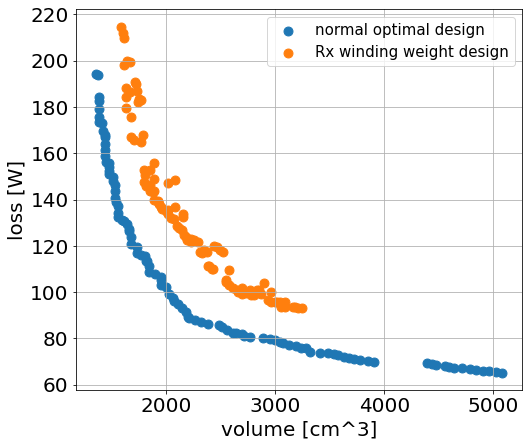

In [7]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)


plt.scatter(read_data1["V"], read_data1["total_loss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["total_loss"] ,s=80)
#plt.scatter(read_data3["V"], read_data3["total_loss"] ,s=80)
#plt.scatter(read_data1["V"], read_data1["copperloss_tx"] ,s=80)
#plt.scatter(read_data2["V"], read_data2["copperloss_tx"] ,s=80)
#plt.scatter(read_data3["V"], read_data3["copperloss_tx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["normal optimal design","Rx winding weight design"], fontsize=15)

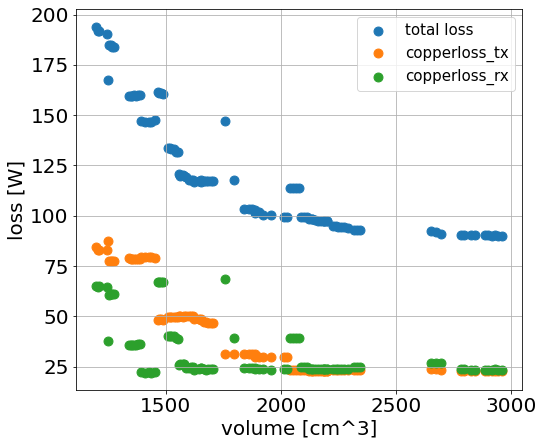

In [ ]:
import yaml
import os
import subprocess
import random
import csv
import time
import csv
import numpy as np
import math
import pandas as pd
import shutil

#from pycaret.regression import load_model


																																																

REFERENCE_SCRIPT_FILE_NAME = f'run_ansys_ref.py'

def random_choice(X) :
    return round(np.random.choice( np.arange( X[0] , X[1]+X[2] , X[2]) ),X[3])
    
def run_simul(version_idx_str):
    #0 Initialize random variables

    X_len_range = [2, 20, 1, 0]
    Y_len_range = [5, 20, 1, 0] # under, upper, resolution
    Z_len_range = [10, 50, 1, 0]
    len_range = [1, 4.5, 0.5, 1]
    
    Cur1_range = [10, 1000, 50, 0]
    Cur2_range = [10,2000,50,0]

    # Design 1

    X_len = random_choice(X_len_range)
    Y_len = random_choice(Y_len_range)
    Z_len = random_choice(Z_len_range)
    len = random_choice(len_range)
    
    Cur1 = random_choice(Cur1_range)
    Cur2 = random_choice(Cur2_range)

    Y_comp = 21*len/16-Y_len
    
    if Y_comp>0:
        len = len-1
   
    #print(l2_range)
        
    #FIXME : add some variables


    #0.5 Config Identifier-Variable set.
    config = {
        "$VERSION_IDX_STR"  :   version_idx_str,
        "$X_len"  :  X_len,
        "$Y_len"  :  Y_len,
        "$Z_len"  :  Z_len,
        "$len"  :  len,
        "$Cur1"  :  Cur1,
        "$Cur2"  :  Cur2,
              
        #FIXME : add some idt : variables
    }


    #1 Make Folder
    folder_name = f'SIMUL_{version_idx_str}'
    os.mkdir(f'.\\ML\\SIMUL_{version_idx_str}')


    #2 Make Variable info file
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\info.yaml', "w") as info_file:
        yaml.dump(config,info_file)


    #3 Make python script file
    #Load file string
    ref_script_str = ""
    with open(REFERENCE_SCRIPT_FILE_NAME) as f :
        lines = f.readlines()
    ref_script_str = "\n".join(lines)

    #Change Identifiers
    for idt, var in config.items() :
        ref_script_str = ref_script_str.replace(idt, str(var))

    #Save file
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\run_ansys_{version_idx_str}.py',"w") as f :
        f.write(ref_script_str)


    #4 make batch file.
    filepath2 = os.path.join('ML',folder_name,f'run_bat_{version_idx_str}.bat')
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\run_bat_{version_idx_str}.bat',"w") as f :
        f.write(f'"C:\\Program Files\\AnsysEM\\AnsysEM21.1\\Win64\\ansysedt.exe" -iconic -runscript ".\\run_ansys_{version_idx_str}.py"')


    workingDir = f'.\\ML\\SIMUL_{version_idx_str}'
    executeFile =  f'.\\ML\\SIMUL_{version_idx_str}\\run_bat_{version_idx_str}.bat'
    #os.chdir(workingDir)
    try :
        os.system(executeFile)
        print(executeFile)
    except :
        time.sleep(1)

    temp1 = pd.read_csv(f'.\ML_data\magnetizing inductance{version_idx_str}.csv', sep=",")
    if temp1.columns[1] == "Matrix1.CplCoef(Current1,Current2)^2 * Matrix1.L(Current1,Current1) [mH]" :
        temp1 = temp1.to_numpy()
        temp1[:,1] = temp1[:,1]*1000
        temp1[:,2] = temp1[:,2]*1000
    else :
        temp1 = temp1.to_numpy()

    parameter = np.array([X_len,Y_len,Z_len,len,Cur1,Cur2])
    print(parameter)

    temp1 = np.append(parameter,temp1)

    data1 = np.loadtxt(f'Z:\Autosimul_data\education\ML_param\parameter.csv', delimiter=",")
    new_data1 = np.vstack((data1, temp1))
    np.savetxt(f'Z:\Autosimul_data\education\ML_param\parameter.csv',new_data1,delimiter=",")


for i in range(4, 1000): 

    #run_simul(i)
    #print("end")


    try :
        try:
            os.remove(f'.\ML_aedt\ML1.aedt.lock')
        except Exception as e: 
            print(f'error before remove : {e}')
            time.sleep(1)
        if os.path.isfile(f'.\ML_aedt\ML1.aedt') :
            os.remove(f'.\ML_aedt\ML1.aedt')
        time.sleep(1)	

        shutil.copy(f'.\ML_aedt\ML_ref.aedt',f'.\ML_aedt\ML1.aedt')
        print(f'copy compelete')
        time.sleep(1)

        try:
            run_simul(i)
            print(f'run_simul compelete')
        except Exception as e: 
            print(f'error run_simul {i}')
            print(e)

        if os.path.isfile(f'.\ML_aedt\ML1.aedt') :
            os.remove(f'.\ML_aedt\ML1.aedt')
        time.sleep(1)	

        shutil.rmtree(f'.\ML_aedt\ML1.aedtresults')
        try:
            os.remove(f'.\ML_aedt\ML1.aedt.lock')
        except:
            print(f'error after remove : {e}')
            time.sleep(1)
    except :
        time.sleep(1)	


    
    time.sleep(1)


os.system("pause")
